# Image Captioning
### Generating Captions for Images

## Steps 
* Data collection
+ Understanding the data
* Data Cleaning
+ Loading the training set
* Data Preprocessing — Images
+ Data Preprocessing — Captions
* Data Preparation using Generator Function
+ Word Embeddings
* Model Architecture
+ Inference

## Data collection:
- Data collection is defined as the procedure of collecting, measuring and analyzing accurate 
insights for research using standard validated techniques. 

## Understanding the data
- here we will be reading our files i.e. our training images and test images with their captions which are stored in txt file. each image is having five captions with different ids.
* for eg: 

- 1000268201_693b08cb0e jpg#0   A child in a pink dress is climbing up a set of stairs in an entry way
- 1000268201_693b08cb0e jpg#1   A girl going into a wooden building
- 1000268201_693b08cb0e jpg#2   A little girl climbing into a wooden playhouse
- 1000268201_693b08cb0e jpg#3   A little girl climbing the stairs to her playhouse
- 1000268201_693b08cboe jpg#4   A little girl in a pink dress going into a wooden cabin

here we see this image id has five id's numbering from 0 to 4. and different caption for same image.

## Data Cleaning
Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled. 

- so to remove this anmalies in data, we have cleaned our captions as some were having null values ans we have extracted caption id and captions here

* we also have removed the determiners like a the an, because they are used almost in all sentences and so we do not have count of unique words, so to get that we have cleaned our sentences

- create vocabulary for this model
* filter words from the vocab according to certain threshold frequency
- get the total word count and unique words count
* also check which words were used most number of times, getting the frequency count of each unique words

this was all we have done in this cleaning part of our data


## preparing our training dataset
- Here we had prepared descriptions for training data
* tweak - add < s > and < e > token to our training data, added this START and END markers so as to get the model understand where exactly the sentence starts and where to stop.
- VECTORIZING THE TEXT DATA:

- We'll use the TextVectorization layer to vectorize the text data, that is to say, to turn the original strings into integer sequences where each integer represents the index of a word in a vocabulary. We will use a custom string standardization scheme (strip punctuation characters except < and >) and the default splitting scheme (split on whitespace).

## image preprocessing - images

here first of all we will be handling with extracting features from the images
- so to meet this requirement we will be using keras module ResNet50 in which we have ImageNet model which is already pre trained to meet this requirement
* NORMALIZATION
- in this preprocessing of images we will be making each image of <224×224> pixel
- then converted image to array and stored to use it with numpy
* FOR TRAIN IMAGES: image_id -->feature_vector extracted from Resnet Image
- FOR TEST IMAGES: image_id -->feature_vector extracted from Resnet Image


## image preprocessing - captions

- Building a tf.data.Dataset pipeline for training

* We will generate pairs of images and corresponding captions using a tf.data.Dataset object. The pipeline consists of two steps:
- mapped each word which we counted in total words with each number starting 0 and then to end 
* we have added two more words < s > ans < e >, which we used to mark the start and end of sentence, so mapped this too 
- Read the image from the disk
* Tokenize all the five captions corresponding to the image

# Building the model

### Our image captioning architecture consists of three models:

#### CNN: used to extract the image features
#### TransformerEncoder: The extracted image features are then passed to a Transformer based encoder that generates a new representation of the inputs
#### TransformerDecoder: This model takes the encoder output and the text data (sequences) as inputs and tries to learn to generate the caption.

# Model architechture
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
==================================================================================================
input_4 (InputLayer)            (None, 35)           0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 35, 50)       92400       input_4[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 2048)         0           input_3[0][0]                    
__________________________________________________________________________________________________
dropout_2 (Dropout)             (None, 35, 50)       0           embedding_1[0][0]                
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          524544      dropout_1[0][0]                  
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 256)          314368      dropout_2[0][0]                  
__________________________________________________________________________________________________
add_33 (Add)                    (None, 256)          0           dense_1[0][0]                    
                                                                 lstm_1[0][0]                     
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 256)          65792       add_33[0][0]                     
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 1848)         474936      dense_2[0][0]                    
==================================================================================================
Total params: 1,472,040
Trainable params: 1,472,040
Non-trainable params: 0
__________________________________________________________________________________________________

# Exploring Dataset
### importing all modules we going to use in our model

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
import re
import nltk
from nltk.corpus import stopwords
import string
import json
from time import time
import pickle
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing. sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Dropout, Embedding, LSTM
from tensorflow.keras.layers import add
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers

### Read text file

In [70]:
def readTextFile(path):
    with open(path) as f:
        captions =f.read()
    return captions

In [71]:
captions = readTextFile("/Users/nikhil/Downloads/Flickr8k_text/Flickr8k.token.txt")
print(captions)

1000268201_693b08cb0e.jpg#0	A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg#1	A girl going into a wooden building .
1000268201_693b08cb0e.jpg#2	A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg#3	A little girl climbing the stairs to her playhouse .
1000268201_693b08cb0e.jpg#4	A little girl in a pink dress going into a wooden cabin .
1001773457_577c3a7d70.jpg#0	A black dog and a spotted dog are fighting
1001773457_577c3a7d70.jpg#1	A black dog and a tri-colored dog playing with each other on the road .
1001773457_577c3a7d70.jpg#2	A black dog and a white dog with brown spots are staring at each other in the street .
1001773457_577c3a7d70.jpg#3	Two dogs of different breeds looking at each other on the road .
1001773457_577c3a7d70.jpg#4	Two dogs on pavement moving toward each other .
1002674143_1b742ab4b8.jpg#0	A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .
1002674143_1b

### total no. of captions while training

In [72]:
print(len(captions.split('\n')))
captions= captions.split('\n')[:-1]

40461


In [73]:
print(len(captions))

40460


## In our dataset, one image has 5 captions here in txt file, so here, 
## We gonna map each image with all five captions in python dictionary

In [74]:
descriptions={}

for x in captions:
      first, second= x.split('\t')
      img_name= first.split('.')[0]

      if descriptions.get(img_name) is None:
            descriptions[img_name]=[]

      descriptions[img_name].append(second)

In [75]:
descriptions['1000268201_693b08cb0e']

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [76]:
IMG_PATH="/Users/nikhil/Downloads/Flicker8k_Dataset/"
import cv2 
import matplotlib.pyplot as plt

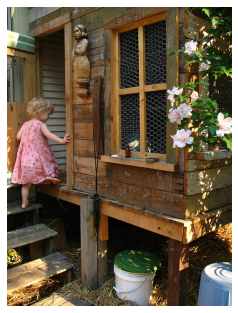

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [77]:
img= cv2.imread(IMG_PATH+"1000268201_693b08cb0e.jpg")
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()
descriptions['1000268201_693b08cb0e']

# DATA CLEANING

In [78]:
def clean_text(sentence ):
      sentence = sentence.lower()
      sentence = re.sub("[^a-z]+"," ",sentence)
      sentence= sentence.split()

      sentence = [s for s in sentence if len(s)>1]
      sentence= " ".join(sentence)
      return sentence

In [79]:
clean_text(" a cat is sitting @ here 43 number window")

'cat is sitting here number window'

In [80]:
clean_text("descriptions['1000268201_693b08cb0e']")

'descriptions cb'

In [81]:
for key, caption_list in descriptions.items():
      for i in range(len(caption_list)):
            caption_list[i]=clean_text(caption_list[i])

In [82]:
descriptions['1000268201_693b08cb0e']

['child in pink dress is climbing up set of stairs in an entry way',
 'girl going into wooden building',
 'little girl climbing into wooden playhouse',
 'little girl climbing the stairs to her playhouse',
 'little girl in pink dress going into wooden cabin']

In [83]:
#saving all these cleaned captions as txt file

with open("descriptions.txt","w") as f:
      f.write(str(descriptions))
      

# now Lets create Vocab

In [84]:
descriptions = None
with open("descriptions.txt",'r') as f:
      descriptions = f.read()

descriptions = json.loads(descriptions.replace("\'","\""))

In [85]:
print(type(descriptions))

<class 'dict'>


In [86]:
descriptions['1000268201_693b08cb0e']

['child in pink dress is climbing up set of stairs in an entry way',
 'girl going into wooden building',
 'little girl climbing into wooden playhouse',
 'little girl climbing the stairs to her playhouse',
 'little girl in pink dress going into wooden cabin']

In [87]:
# create vocab

vocab =set()
for key in descriptions.keys():
      [vocab.update(sentence.split()) for sentence in descriptions[key]]

print("vocab size %d"% len(vocab))

vocab size 8424


In [88]:
total_words=[]

for key in descriptions.keys():
      [total_words.append(i) for des in descriptions[key] for i in des.split()]

print(len(total_words))

373837


In [89]:
# filter words from the vocab according to certain threshold frequency

import collections

counter = collections.Counter(total_words)
freq_cnt= dict(counter)
print(len(freq_cnt.keys()))

8424


In [90]:
sorted_freq_cnt= sorted(freq_cnt.items(), reverse=True, key=lambda x:x[1])

#filter
threshold=10
sorted_freq_cnt=[x for x in sorted_freq_cnt if x[1]>threshold]
total_words=[x[0] for x in sorted_freq_cnt ]

In [91]:
sorted_freq_cnt

[('in', 18987),
 ('the', 18420),
 ('on', 10746),
 ('is', 9345),
 ('and', 8863),
 ('dog', 8138),
 ('with', 7765),
 ('man', 7275),
 ('of', 6723),
 ('two', 5643),
 ('white', 3959),
 ('black', 3848),
 ('boy', 3581),
 ('are', 3505),
 ('woman', 3403),
 ('girl', 3328),
 ('to', 3176),
 ('wearing', 3062),
 ('at', 2916),
 ('people', 2887),
 ('water', 2790),
 ('red', 2691),
 ('young', 2630),
 ('brown', 2578),
 ('an', 2432),
 ('his', 2357),
 ('blue', 2279),
 ('dogs', 2125),
 ('running', 2073),
 ('through', 2032),
 ('playing', 2008),
 ('while', 1968),
 ('shirt', 1962),
 ('down', 1843),
 ('standing', 1789),
 ('ball', 1783),
 ('little', 1768),
 ('grass', 1622),
 ('snow', 1547),
 ('child', 1545),
 ('person', 1542),
 ('jumping', 1473),
 ('over', 1415),
 ('three', 1389),
 ('front', 1386),
 ('sitting', 1368),
 ('holding', 1324),
 ('up', 1302),
 ('field', 1283),
 ('small', 1278),
 ('by', 1249),
 ('large', 1237),
 ('green', 1234),
 ('one', 1223),
 ('group', 1218),
 ('yellow', 1217),
 ('her', 1178),
 ('walk

In [92]:
print(len(total_words))

1845


# prepare train test data

In [93]:
train_file_data = readTextFile("/Users/nikhil/Downloads/Flickr8k_text/Flickr_8k.trainImages.txt")
test_file_data = readTextFile("/Users/nikhil/Downloads/Flickr8k_text/Flickr_8k.testImages.txt")



In [94]:
train=[row.split('.')[0] for row in train_file_data.split("\n")[:-1]]
test=[row.split('.')[0] for row in test_file_data.split("\n")[:-1]]


In [95]:
train[:10]
test[:10]

['3385593926_d3e9c21170',
 '2677656448_6b7e7702af',
 '311146855_0b65fdb169',
 '1258913059_07c613f7ff',
 '241347760_d44c8d3a01',
 '2654514044_a70a6e2c21',
 '2339106348_2df90aa6a9',
 '256085101_2c2617c5d0',
 '280706862_14c30d734a',
 '3072172967_630e9c69d0']

In [96]:
#prepare descriptions for training data
# tweak - add <s> and <e> token to our training data

train_descriptions={}

for img_id in train: 
      train_descriptions[img_id]=[]
      for cap in descriptions[img_id]:
            cap_to_append="startseq "+ cap+" endseq"
            train_descriptions[img_id].append(cap_to_append)

In [97]:
train_descriptions['1000268201_693b08cb0e']

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq']

# Transfer Learning
- Images --> Features
- Text ---> Features 


+ image feature extraction 

In [98]:
model= ResNet50(weights="imagenet", input_shape=(224,224,3))
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [99]:
model_new= Model(model.input, model.layers[-2].output)

In [100]:
def preprocess_img(img):
      img = image.load_img(img, target_size=(224,224))
      img = image.img_to_array(img)
      img = np.expand_dims(img,axis=0)
      #normalization
      img = preprocess_input(img)
      return img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


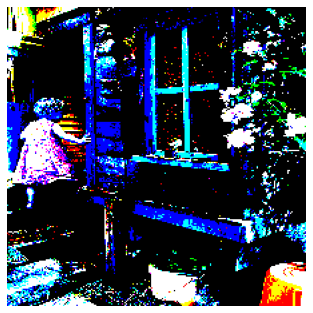

[[[[ -30.939003   -61.779      -67.68     ]
   [  13.060997     6.2210007  -17.68     ]
   [  34.060997    32.221        5.3199997]
   ...
   [ -99.939     -116.779     -118.68     ]
   [ -98.939     -111.779     -118.68     ]
   [-101.939     -108.779     -120.68     ]]

  [[ -36.939003   -68.779      -72.68     ]
   [  21.060997     9.221001   -13.68     ]
   [  38.060997    37.221        8.32     ]
   ...
   [ -94.939     -104.779     -113.68     ]
   [ -93.939     -108.779     -116.68     ]
   [ -90.939      -86.779     -102.68     ]]

  [[ -39.939003   -74.779      -76.68     ]
   [  26.060997    13.221001    -9.68     ]
   [  41.060997    36.221        6.3199997]
   ...
   [ -99.939     -107.779     -115.68     ]
   [-101.939     -107.779     -121.68     ]
   [ -95.939     -101.779     -123.68     ]]

  ...

  [[ -27.939003    56.221      107.32     ]
   [ -92.939      -49.779       20.32     ]
   [ -49.939003   -13.778999    35.32     ]
   ...
   [ 150.061      132.22101    126.

In [101]:
# normalization
img = preprocess_img(IMG_PATH+"1000268201_693b08cb0e.jpg")
plt.imshow(img[0])
plt.axis('off')
plt.show()
print(img)



In [102]:
def encode_image(img):
      img=preprocess_img(img)
      feature_vector=model_new.predict(img)
      #print(feature_vector.shape)
      feature_vector = feature_vector.reshape((-1,))
      return feature_vector

In [103]:
encode_image(IMG_PATH+"1000268201_693b08cb0e.jpg")

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


array([0.06535944, 0.16782582, 0.32517618, ..., 0.05107151, 0.32821235,
       1.0043371 ], dtype=float32)

In [104]:
# encoding_train={}
# #image_id ---> feature_vector extracted from resnet image

# for ix, img_id in enumerate(train):
#       img_path = IMG_PATH+"/"+img_id+".jpg"
#       encoding_train[img_id]= encode_image(img_path)

#       if ix%100==0:
#             print("encoding in progress time step  %d "%ix)

In [105]:
# store EVERYTHING TO THE DISK

# with open("encoded_train_features.pkl", "wb") as f:
#       pickle.dump(encoding_train,f)


In [106]:
# encoding_test={}
# #image_id ---> feature_vector extracted from resnet image

# for ix, img_id in enumerate(test):
#       img_path = IMG_PATH+"/"+img_id+".jpg"
#       encoding_test[img_id]= encode_image(img_path)

#       if ix%100==0:
#             print("test encoding in progress time step  %d "%ix)

In [107]:
# store EVERYTHING TO THE DISK

# with open("encoded_test_features.pkl", "wb") as f:
#       pickle.dump(encoding_test,f)

# data preprocessing for captions

In [108]:
# vocab 
# len(total_words)

In [109]:
word_to_idx={}
idx_to_word={}

for i , word in enumerate(total_words):
      word_to_idx[word]=i+1
      idx_to_word[i+1]=word


In [110]:
idx_to_word[1]
len(idx_to_word)

1845

In [111]:
# two special words we added in the dictionary

idx_to_word[1846]='startseq'
word_to_idx['startseq']=1846

idx_to_word[1847]='endseq'
word_to_idx['endseq']=1847

vocab_size= len(word_to_idx)+1
print("vocab size", vocab_size)

vocab size 1848


In [112]:
max_len=0
for key in train_descriptions.keys():
      for cap in train_descriptions[key]:
            max_len= max(max_len,len(cap.split()))

print(max_len)

35


# Model architechture
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
==================================================================================================
input_4 (InputLayer)            (None, 35)           0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 35, 50)       92400       input_4[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 2048)         0           input_3[0][0]                    
__________________________________________________________________________________________________
dropout_2 (Dropout)             (None, 35, 50)       0           embedding_1[0][0]                
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          524544      dropout_1[0][0]                  
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 256)          314368      dropout_2[0][0]                  
__________________________________________________________________________________________________
add_33 (Add)                    (None, 256)          0           dense_1[0][0]                    
                                                                 lstm_1[0][0]                     
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 256)          65792       add_33[0][0]                     
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 1848)         474936      dense_2[0][0]                    
==================================================================================================
Total params: 1,472,040
Trainable params: 1,472,040
Non-trainable params: 0
__________________________________________________________________________________________________

# Data loader (Generator)

In [113]:
def data_generator(train_descriptions, encoding_train, word_to_idx, max_len,batch_size):
      X1,X2,y=[],[],[]
      n=0
      while True:
            for key, desc_list in train_descriptions.items():
                  n=n+1

                  photo=encoding_train[key+".jpg"]
                  for desc in desc_list:
                        seq= [word_to_idx[word] for word in desc.split() if word in word_to_idx]
                        for i in range(1, len(seq)):
                              xi=seq[0:i]
                              yi=seq[i]

                              # 0 denotes padding
                              xi = pad_sequences([xi], maxlen=max_len, value=0, padding='post')[0]
                              yi= to_categorical([yi], num_classes==vocab_size)[0]
                              X1.append(photo)
                              X2.append(xi)
                              y.append(yi)

                        if n==batch_size:
                              yield[[np.array(X1), np.array(X2)],np.array(y)]

                              X1,X2,y= [],[],[]
                              n=0

## Word Embeddings 

In [114]:
f = open("/Users/nikhil/downloads/glove.6B.50d.txt",encoding='utf8')

In [115]:
embedding_index = {}

for line in f:
    values = line.split()
    
    word = values[0]
    word_embedding = np.array(values[1:],dtype='float')
    embedding_index[word] = word_embedding

In [116]:
f.close()

In [117]:
embedding_index['apple']

array([ 0.52042 , -0.8314  ,  0.49961 ,  1.2893  ,  0.1151  ,  0.057521,
       -1.3753  , -0.97313 ,  0.18346 ,  0.47672 , -0.15112 ,  0.35532 ,
        0.25912 , -0.77857 ,  0.52181 ,  0.47695 , -1.4251  ,  0.858   ,
        0.59821 , -1.0903  ,  0.33574 , -0.60891 ,  0.41742 ,  0.21569 ,
       -0.07417 , -0.5822  , -0.4502  ,  0.17253 ,  0.16448 , -0.38413 ,
        2.3283  , -0.66682 , -0.58181 ,  0.74389 ,  0.095015, -0.47865 ,
       -0.84591 ,  0.38704 ,  0.23693 , -1.5523  ,  0.64802 , -0.16521 ,
       -1.4719  , -0.16224 ,  0.79857 ,  0.97391 ,  0.40027 , -0.21912 ,
       -0.30938 ,  0.26581 ])

In [118]:
def get_embedding_matrix():
    emb_dim = 50
    matrix = np.zeros((vocab_size,emb_dim))
    for word,idx in word_to_idx.items():
        embedding_vector = embedding_index.get(word)
        
        if embedding_vector is not None:
            matrix[idx] = embedding_vector
            
    return matrix

In [119]:
embedding_matrix = get_embedding_matrix()
embedding_matrix.shape

(1848, 50)

In [120]:
#embedding_matrix[1847]

## Model Architecture

In [121]:
input_img_features = Input(shape=(2048,))
inp_img1 = Dropout(0.3)(input_img_features)
inp_img2 = Dense(256,activation='relu')(inp_img1)

In [122]:
print(np.__version__)

1.19.5


In [123]:
# Captions as Input
input_captions = Input(shape=(max_len,))
inp_cap1 = Embedding(input_dim=vocab_size,output_dim=50,mask_zero=True)(input_captions)
inp_cap2 = Dropout(0.3)(inp_cap1)
inp_cap3 = LSTM(256)(inp_cap2)


In [124]:
decoder1 = add([inp_img2,inp_cap3])
decoder2 = Dense(256,activation='relu')(decoder1)
outputs = Dense(vocab_size,activation='softmax')(decoder2)

# Combined Model
model = Model(inputs=[input_img_features,input_captions],outputs=outputs)

In [125]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 35)]         0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 2048)]       0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 35, 50)       92400       input_6[0][0]                    
__________________________________________________________________________________________________
dropout_2 (Dropout)             (None, 2048)         0           input_5[0][0]                    
____________________________________________________________________________________________

In [126]:
# Important Thing - Embedding Layer
model.layers[2].set_weights([embedding_matrix])
model.layers[2].trainable = False

In [127]:
model.compile(loss='categorical_crossentropy',optimizer="adam")

### Training of Model

In [128]:
epochs = 20
batch_size = 3
steps = len(train_descriptions)//100


In [129]:
encoding_train=pd.read_pickle("/Users/nikhil/Documents/image_captioning/encoded_train_features.pkl")
encoding_test=pd.read_pickle("/Users/nikhil/Documents/image_captioning/encoded_test_features.pkl")
def train():
    
    for i in range(epochs):
        generator = data_generator(train_descriptions,encoding_train,word_to_idx,max_len,batch_size)
        model.fit(generator,epochs=1,steps_per_epoch=steps,verbose=1)
        model.save_weights("model_"+str(i)+".h5")
        print("saved weights")


<img src="reducing loss.png" height="800" width="1300">

In [130]:
model = load_model('/Users/nikhil/Downloads/model_9.h5')

## Predictions

In [131]:
def predict_caption(photo):
    
    in_text = "startseq"
    for i in range(max_len):
        sequence = [word_to_idx[w] for w in in_text.split() if w in word_to_idx]
        sequence = pad_sequences([sequence],maxlen=max_len,padding='post')
        
        ypred = model.predict([photo,sequence])
        ypred = ypred.argmax() #WOrd with max prob always - Greedy Sampling
        word = idx_to_word[ypred]
        in_text += (' ' + word)
        
        if word == "endseq":
            break
    
    final_caption = in_text.split()[1:-1]
    final_caption = ' '.join(final_caption)
    return final_caption

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


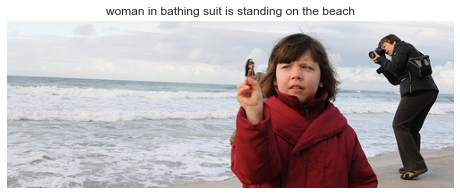

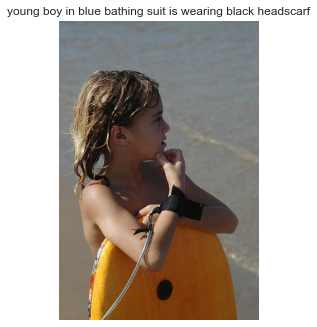

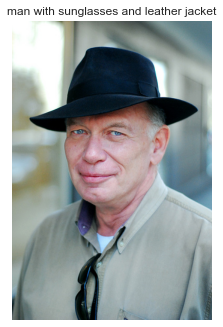

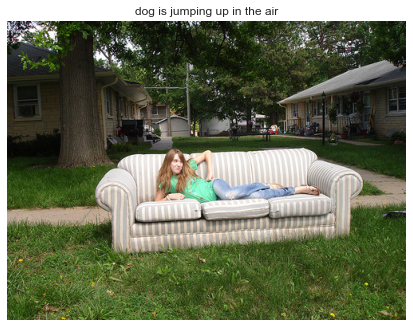

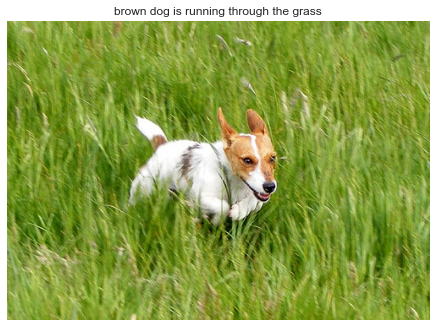

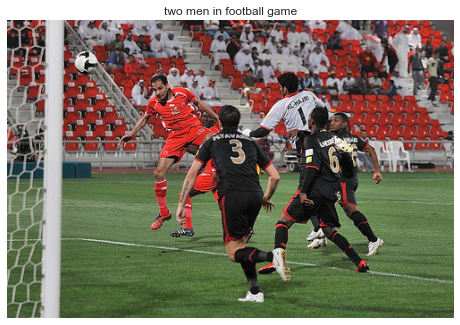

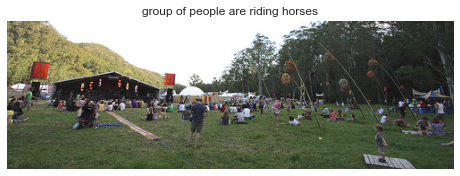

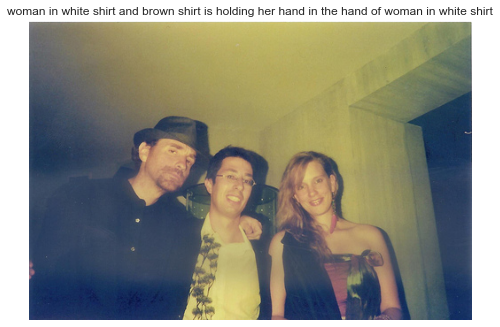

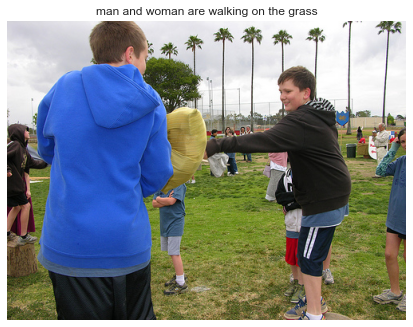

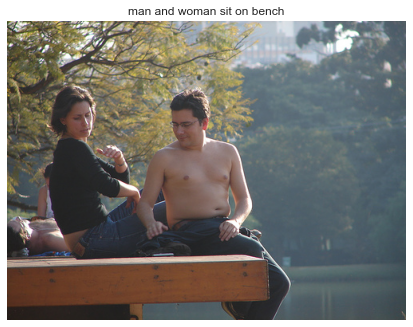

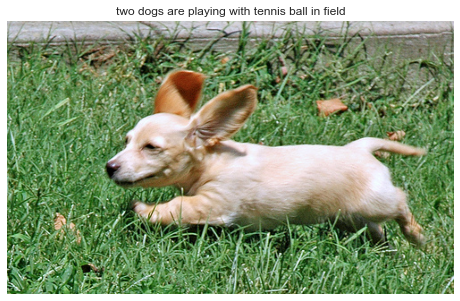

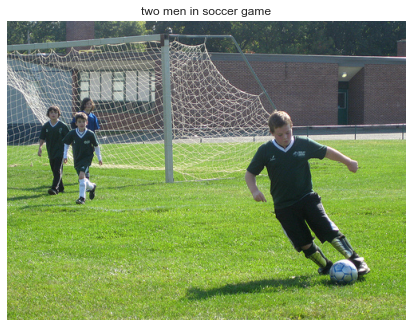

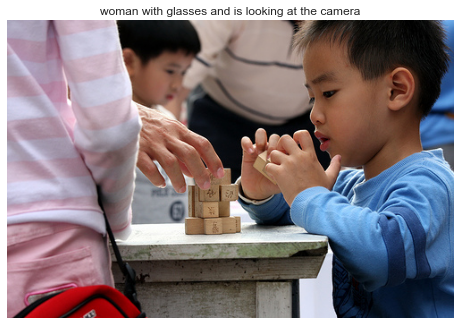

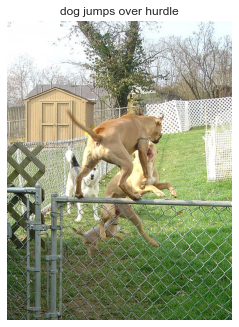

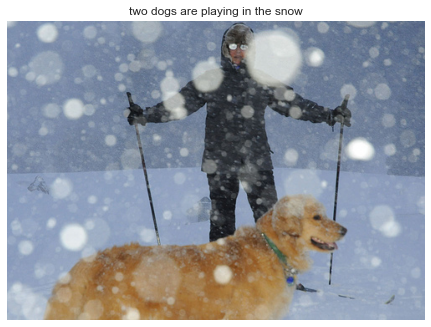

In [132]:
# Pick Some Random Images and See Results
plt.style.use("seaborn")
for i in range(15):
    idx = np.random.randint(0,1000)
    all_img_names = list(encoding_test.keys())
    img_name = all_img_names[idx]
    photo_2048 = encoding_test[img_name].reshape((1,2048))
    
    i = plt.imread("/Users/nikhil/Downloads/Flicker8k_Dataset/"+img_name+".jpg")
    
    caption = predict_caption(photo_2048)
    #print(caption)
    
    plt.title(caption)
    plt.imshow(i)
    plt.axis("off")
    plt.show()

In [133]:
#encoding_test["3385593926_d3e9c21170"].shape
